In [1]:
library(Seurat)
library(patchwork)
library(BPCells)
library(SeuratObject)
library(SeuratData)


Loading required package: SeuratObject

Loading required package: sp


Attaching package: 'SeuratObject'


The following objects are masked from 'package:base':

    intersect, t


-- Installed datasets ------------------------------------------------------- SeuratData v0.2.2.9001 --

v ifnb   3.0.0                                     v pbmc3k 3.1.4


------------------------------------------------- Key -------------------------------------------------

v Dataset loaded successfully
> Dataset built with a newer version of Seurat than installed
(?) Unknown version of Seurat installed




In [2]:
#library(SeuratDisk)
#library(Azimuth)
#library(SeuratData)


In [3]:
#only do it first time
#dgem <- BPCells::open_matrix_anndata_hdf5("scanpy_withscreen/batch12_iGlut_post_raw.h5ad")
#dgem <- BPCells::convert_matrix_type(matrix = dgem, type = 'uint32_t')
#write_matrix_dir(mat = dgem, dir = "scanpy_withscreen/batch12_iGlut_post_raw_BP")

In [4]:
mat <- open_matrix_dir(dir = "scanpy_withscreen/batch12_iGlut_post_raw_BP")


In [5]:
meta <- read.table("scanpy_withscreen/batch12_iGlut_post_raw_meta.tsv",header = TRUE,row.names=1,quote='')

In [6]:
head(meta)

sample        n_genes_by_counts log1p_n_genes_by_counts
67_41_30__s2 iGlut_post_p2 2084              7.642524               
71_50_93__s2 iGlut_post_p2 4400              8.389587               
78_45_70__s1 iGlut_post_p2 5172              8.551208               
60_61_06__s2 iGlut_post_p2 3771              8.235361               
31_28_78__s2 iGlut_post_p2 3064              8.027803               
69_15_66__s3 iGlut_post_p1 6215              8.734882               
             total_counts log1p_total_counts pct_counts_in_top_20_genes
67_41_30__s2  4307         8.368229          15.83469                  
71_50_93__s2 13926         9.541585          11.74781                  
78_45_70__s1 15781         9.666625          10.82948                  
60_61_06__s2 10152         9.225525          12.27344                  
31_28_78__s2  7096         8.867428          13.26099                  
69_15_66__s3 27429        10.219393          10.28474                  
             total_counts_mt log1p_total_counts_mt pct_counts_mt
67_41_30__s2  12             2.564949              0.2786162    
71_50_93__s2  14             2.708050              0.1005314    
78_45_70__s1 179             5.192957              1.1342753    
60_61_06__s2 182             5.209486              1.7927501    
31_28_78__s2  86             4.465908              1.2119504    
69_15_66__s3 126             4.844187              0.4593678    
             total_counts_ribo ... TF_EGFP TF_SMAD9 TF_RXRG TF_RARB TF_NFIA
67_41_30__s2  9                ... 0       0        0       0       0      
71_50_93__s2 47                ... 0       0        0       0       0      
78_45_70__s1 48                ... 0       0        0       0       0      
60_61_06__s2 25                ... 0       0        0       0       0      
31_28_78__s2 18                ... 0       0        0       0       0      
69_15_66__s3 47                ... 0       0        0       0       0      
             TF_MEIS2 TF_HOXB3 pred_label final_label experiment
67_41_30__s2 0        0        unknown    unknown     screen    
71_50_93__s2 0        0        unknown    unknown     screen    
78_45_70__s1 0        0        unknown    unknown     screen    
60_61_06__s2 0        0        unknown    unknown     screen    
31_28_78__s2 0        0        unknown    unknown     screen    
69_15_66__s3 0        0        unknown    unknown     screen

In [7]:
dim(meta)

[1] 30876    65

In [8]:
dim(mat)

[1] 22639 30876

In [9]:
sce <- CreateSeuratObject(counts = mat,meta.data = meta)

In [10]:
sce[["RNA"]] <- split(sce[["RNA"]], f = sce$experiment)

In [11]:
#convert to sparse matrix in memory, else errors in integration step
#sce[["RNA"]]$counts <- as(object = sce[["RNA"]]$counts, Class = "dgCMatrix")

In [12]:
table(sce@meta.data$experiment)


    oe screen 
  9384  21492 

In [13]:
sce

An object of class Seurat 
22639 features across 30876 samples within 1 assay 
Active assay: RNA (22639 features, 0 variable features)
 2 layers present: counts.screen, counts.oe

In [14]:
sce[["percent.mt"]] <- PercentageFeatureSet(sce, pattern = "^MT-")

Warning message:
"Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead."


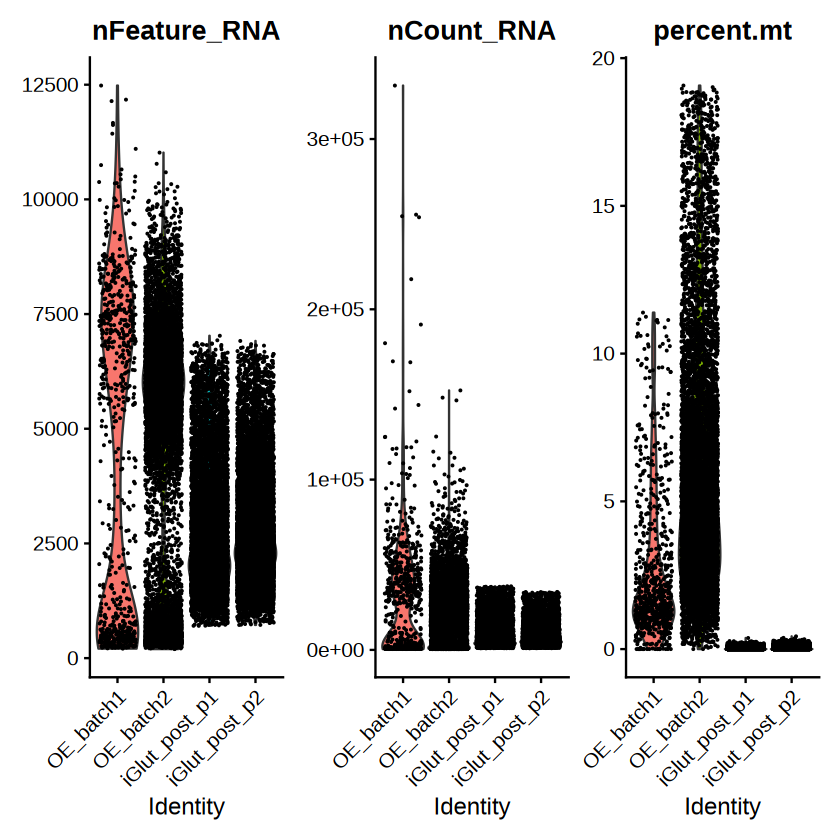

In [15]:
VlnPlot(sce, group.by = 'sample', features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)


Warning message:
"Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead."


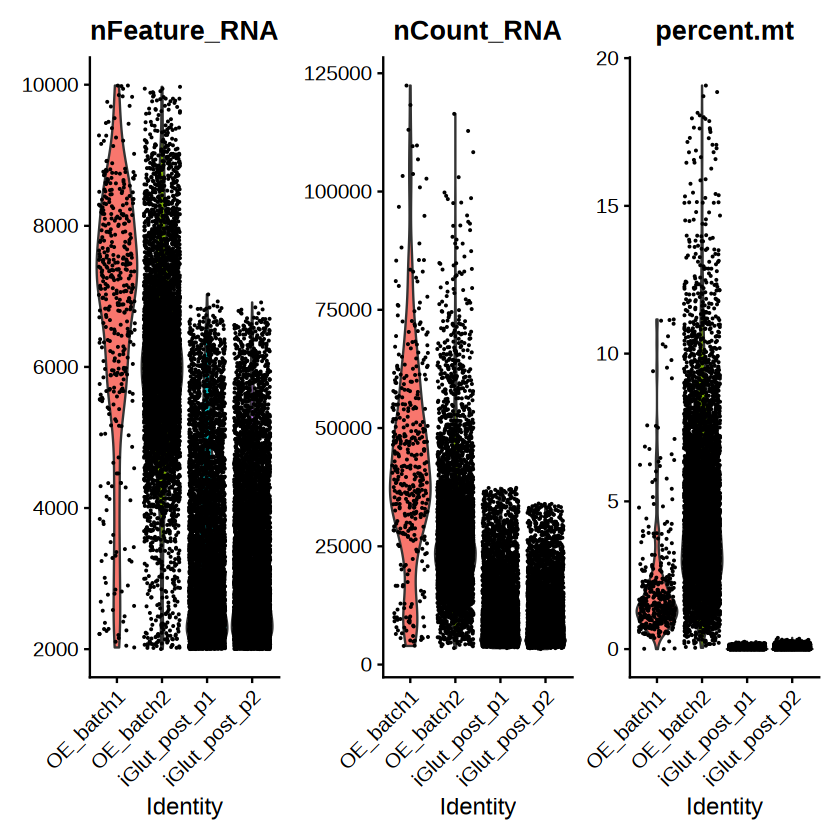

In [16]:
sce <- subset(sce, subset = nFeature_RNA > 2000 & nFeature_RNA < 10000 & percent.mt < 20)
VlnPlot(sce, group.by = 'sample', features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [17]:
ifnb <- sce

In [18]:
ifnb <- SCTransform(ifnb)
ifnb <- RunPCA(ifnb)

Running SCTransform on assay: RNA

Running SCTransform on layer: counts.screen

vst.flavor='v2' set. Using model with fixed slope and excluding poisson genes.

Variance stabilizing transformation of count matrix of size 17299 by 5000

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells

Found 54 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 17299 genes

Computing corrected count matrix for 17299 genes

Calculating gene attributes

Wall clock passed: Time difference of 47.13266 secs

Determine variable features

Centering data matrix

Getting residuals for block 1(of 4) for screen dataset

Getting residuals for block 2(of 4) for screen dataset

Getting residuals for block 3(of 4) for screen dataset

Getting residuals for block 4(of 4) for screen dataset

Centering data matrix

Finished calculating residuals for screen

Running SCTransform on layer: coun

Warning message in ElbowPlot(ifnb, ndims = 100):
"The object only has information for 50 reductions"


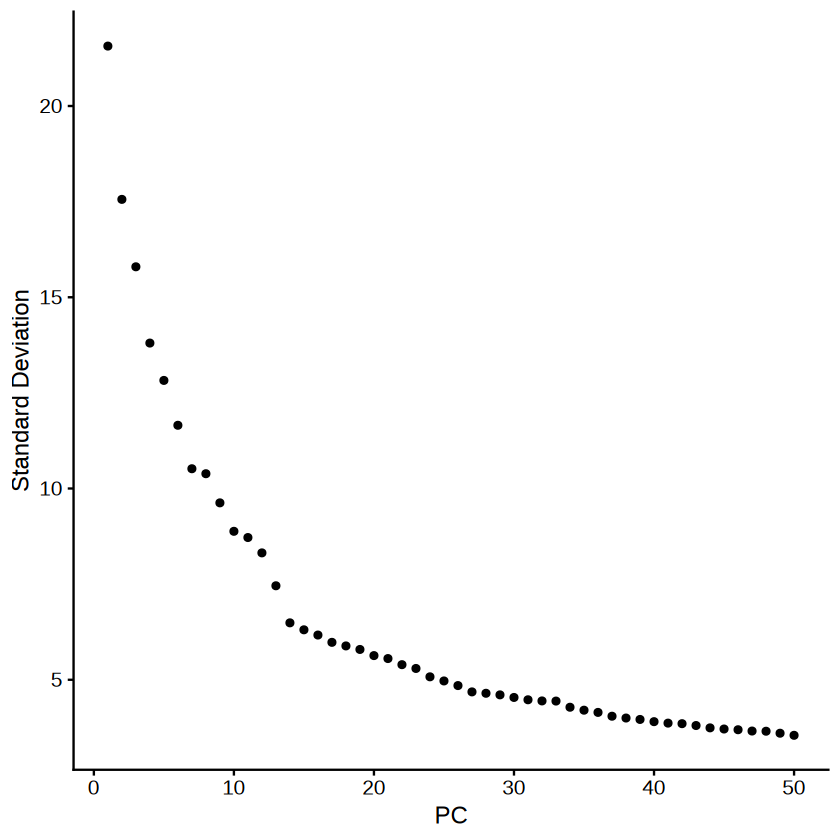

In [19]:
ElbowPlot(ifnb,ndims = 100)

In [20]:
ifnb <- FindNeighbors(ifnb, dims = 1:30, reduction = "pca")
ifnb <- FindClusters(ifnb, resolution = 2, cluster.name = "unintegrated_clusters")

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 22378
Number of edges: 814478

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8699
Number of communities: 37
Elapsed time: 2 seconds


Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
17:12:33 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by 'BiocGenerics'

17:12:33 Read 22378 rows and found 30 numeric columns

17:12:33 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by 'BiocGenerics'

17:12:33 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:12:35 Writing NN index file to 

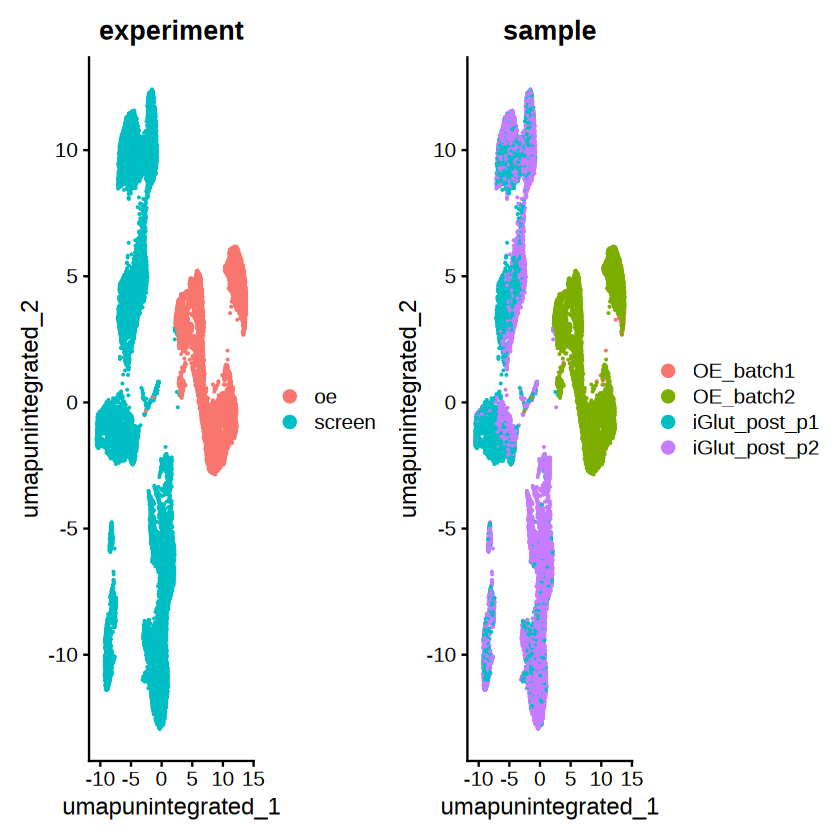

In [21]:
ifnb <- RunUMAP(ifnb, dims = 1:30, reduction = "pca", reduction.name = "umap.unintegrated")
DimPlot(ifnb, reduction = "umap.unintegrated", group.by = c("experiment","sample"))

In [22]:
# integrate datasets
ifnb <- IntegrateLayers(object = ifnb, method = CCAIntegration, normalization.method = "SCT", verbose = F)
ifnb <- FindNeighbors(ifnb, reduction = "integrated.dr", dims = 1:30)
ifnb <- FindClusters(ifnb, resolution = 1)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 22378
Number of edges: 842565

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8861
Number of communities: 23
Elapsed time: 3 seconds


17:13:55 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by 'BiocGenerics'

17:13:55 Read 22378 rows and found 30 numeric columns

17:13:55 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by 'BiocGenerics'

17:13:55 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:13:57 Writing NN index file to temp file /tmp/Rtmp1sPixU/file7e64115e6e05

17:13:58 Searching Annoy index using 1 thread, search_k = 3000

17:14:03 Annoy recall = 100%

17:14:05 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

17:14:08 Initializing from normalized Laplacian + 

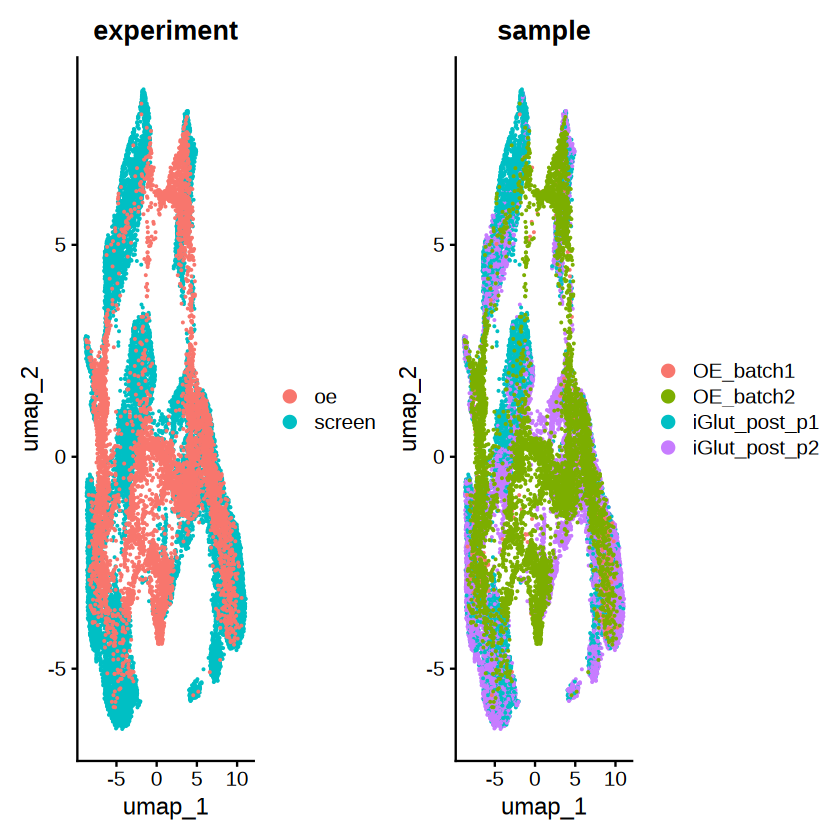

In [23]:
ifnb <- RunUMAP(ifnb, dims = 1:30, reduction = "integrated.dr")
DimPlot(ifnb, reduction = "umap", group.by = c("experiment","sample"))

In [24]:
ifnb

An object of class Seurat 
41550 features across 22378 samples within 2 assays 
Active assay: SCT (18911 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 4 dimensional reductions calculated: pca, umap.unintegrated, integrated.dr, umap

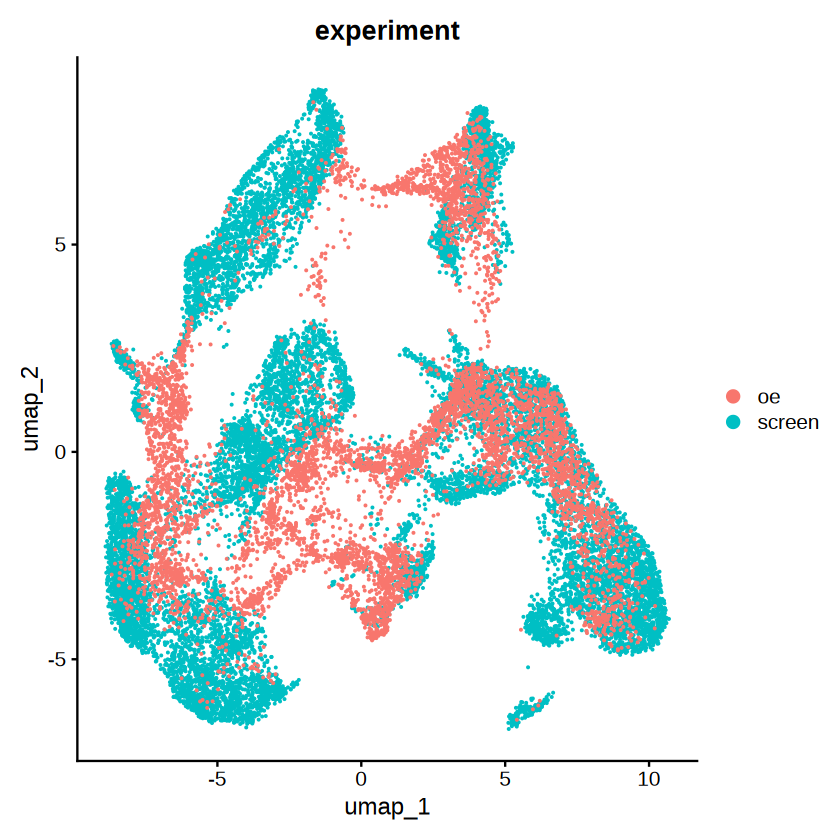

In [29]:
DimPlot(ifnb, reduction = "umap", group.by = c("experiment"))

In [26]:
meta_data_integrated <- ifnb@meta.data

In [33]:
umap_data_integrated <- Embeddings(object = ifnb[["umap"]])

In [36]:
meta_data_integrated <- cbind(meta_data_integrated,umap_data_integrated)

In [37]:
write.table(meta_data_integrated,"scanpy_withscreen/meta_data_integrated_SCT_30PCs.tsv",sep="\t",quote=F)

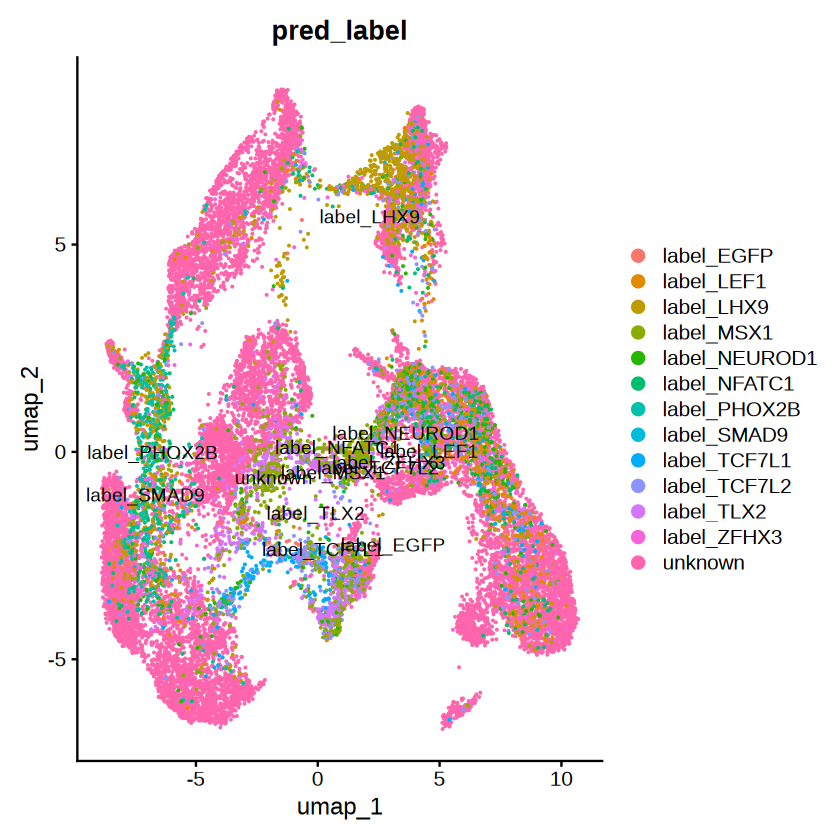

In [30]:
DimPlot(ifnb, reduction = "umap", group.by = c("pred_label"),label = T)

In [33]:
genes_of_interest <- c("LEF1","LHX9","MSX1","NEUROD1","NFATC1","PHOX2B","SMAD9","TCF7L1","TCF7L2",'TLX2','ZFHX3')

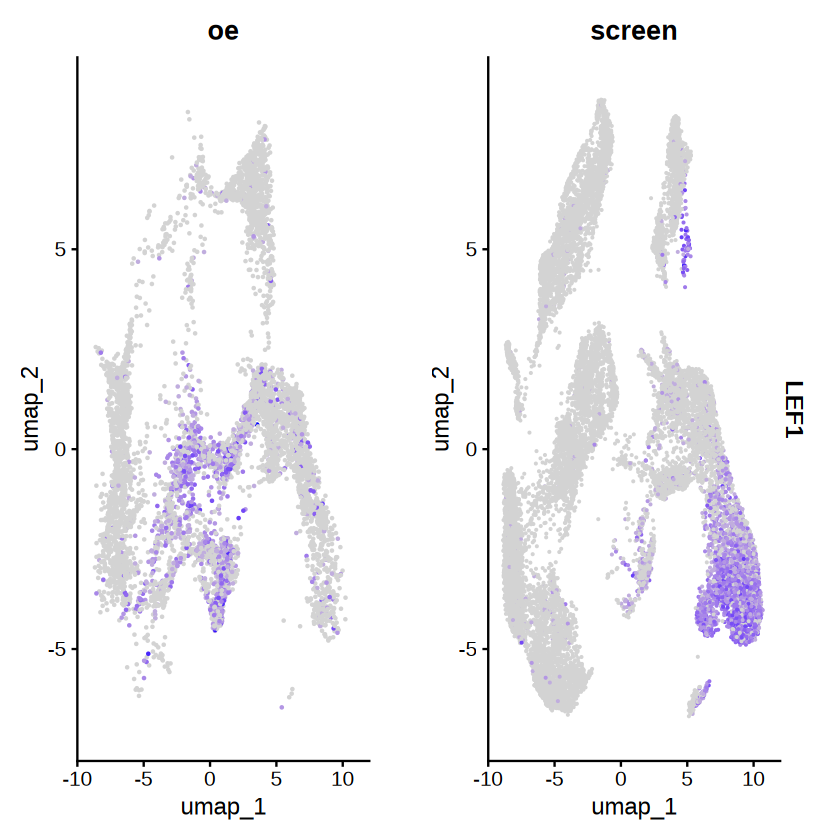

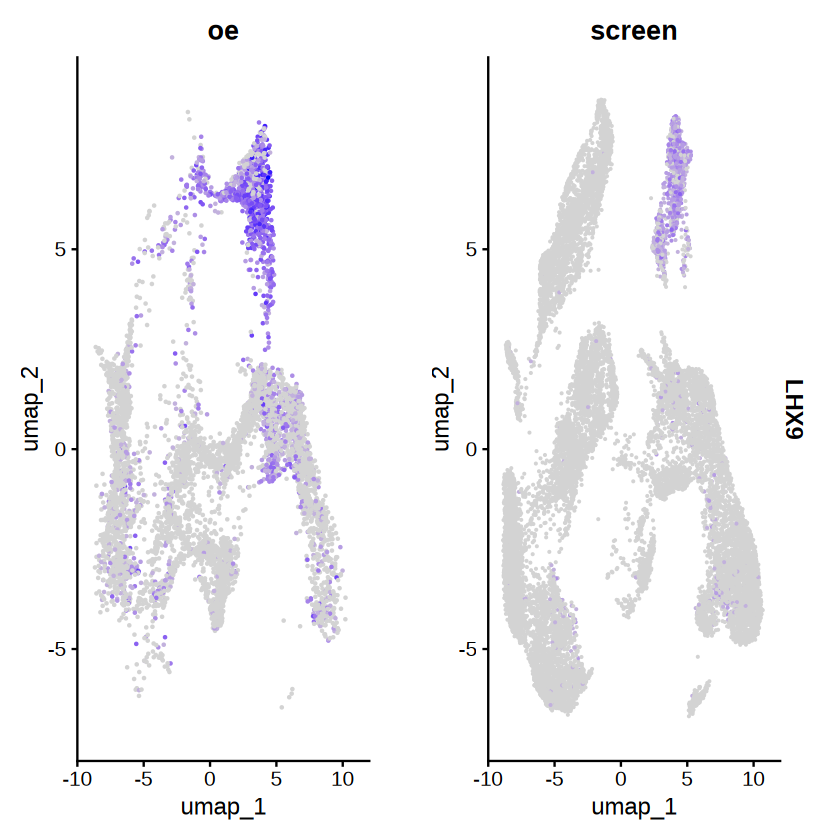

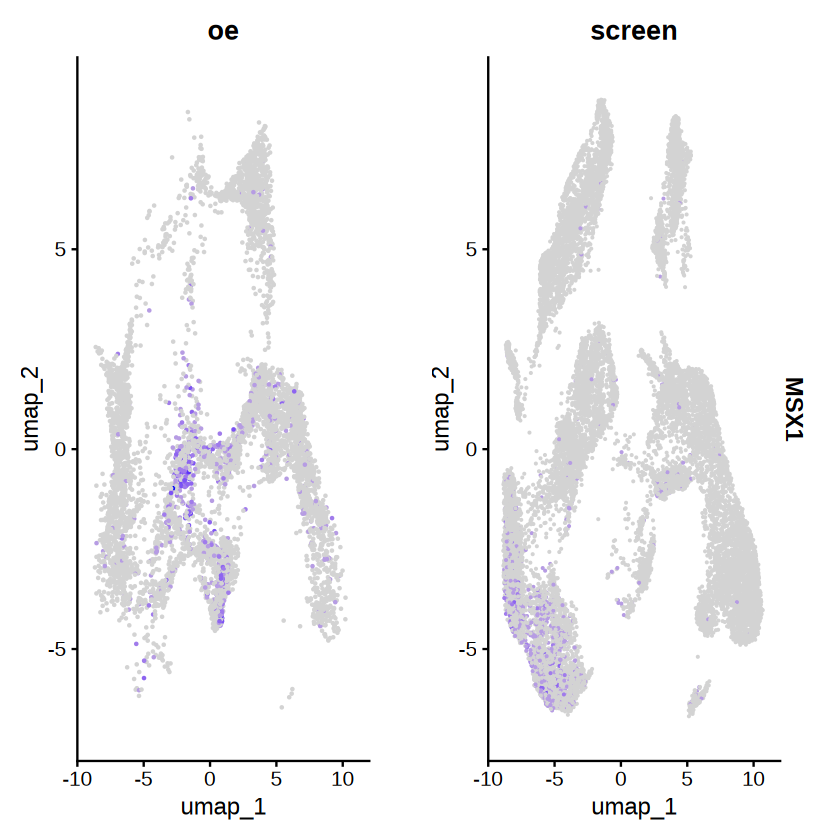

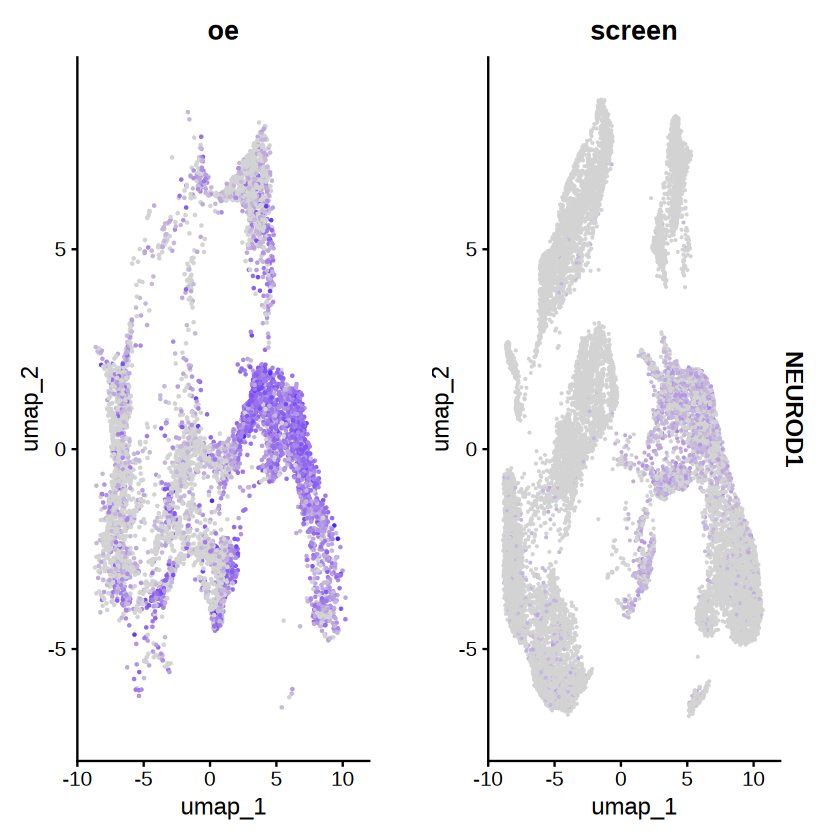

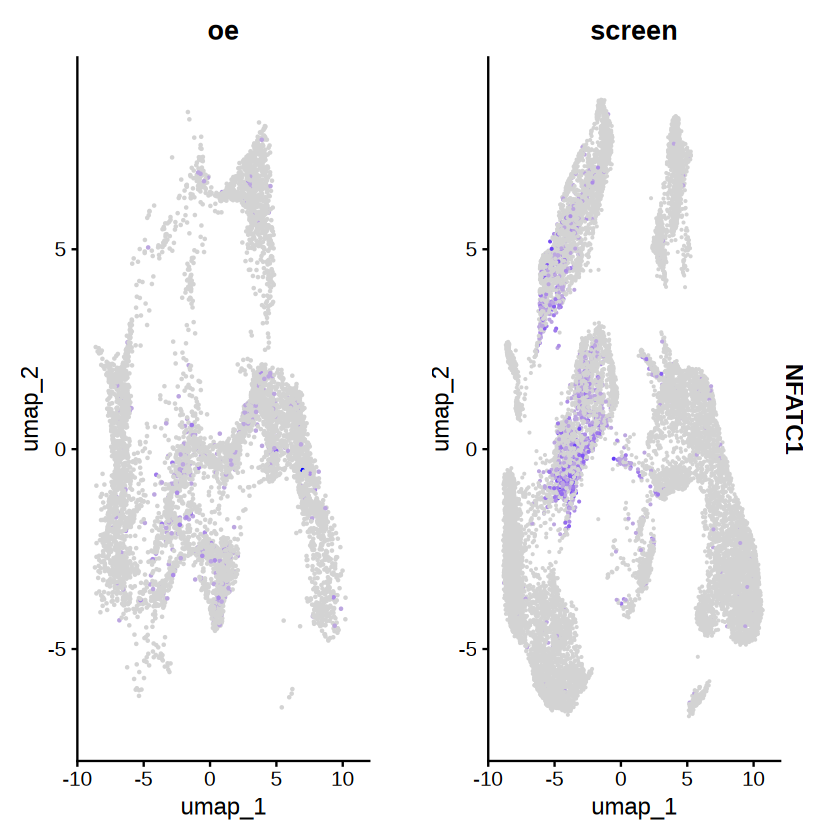

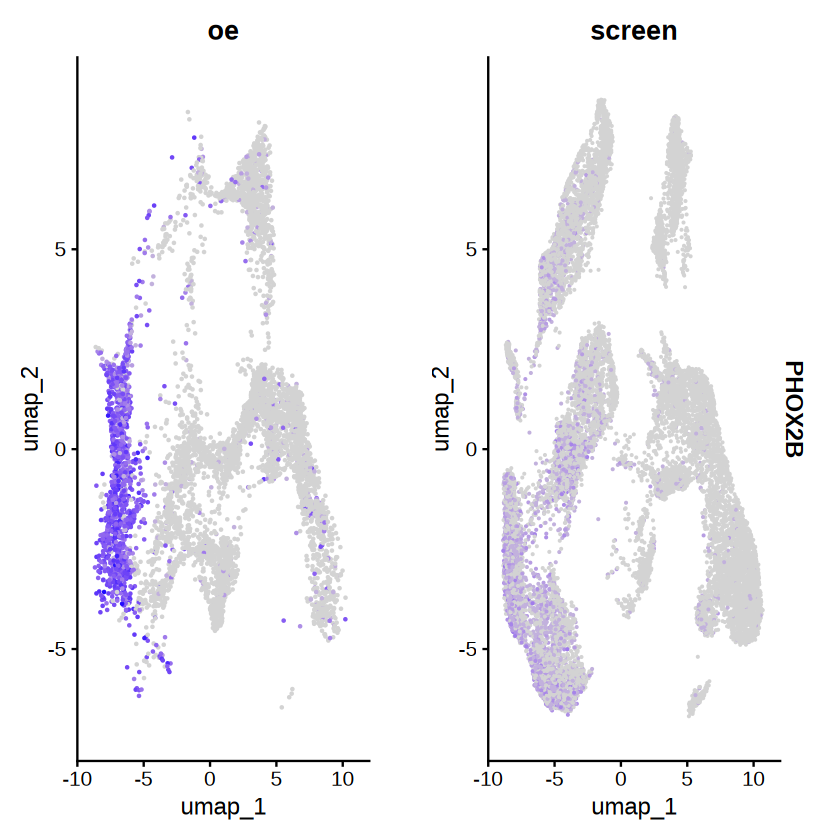

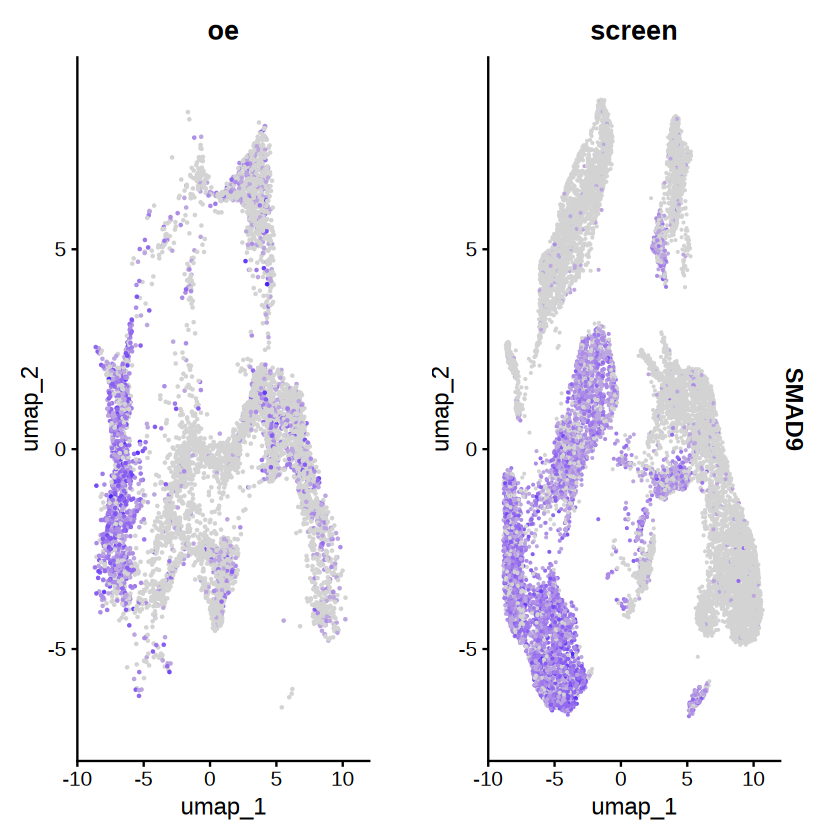

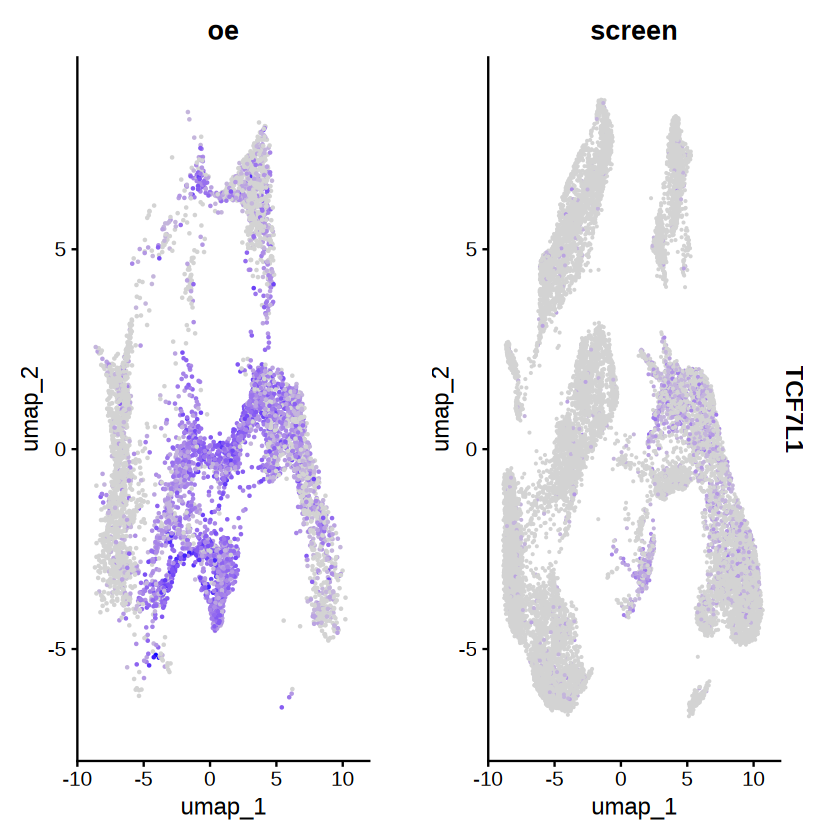

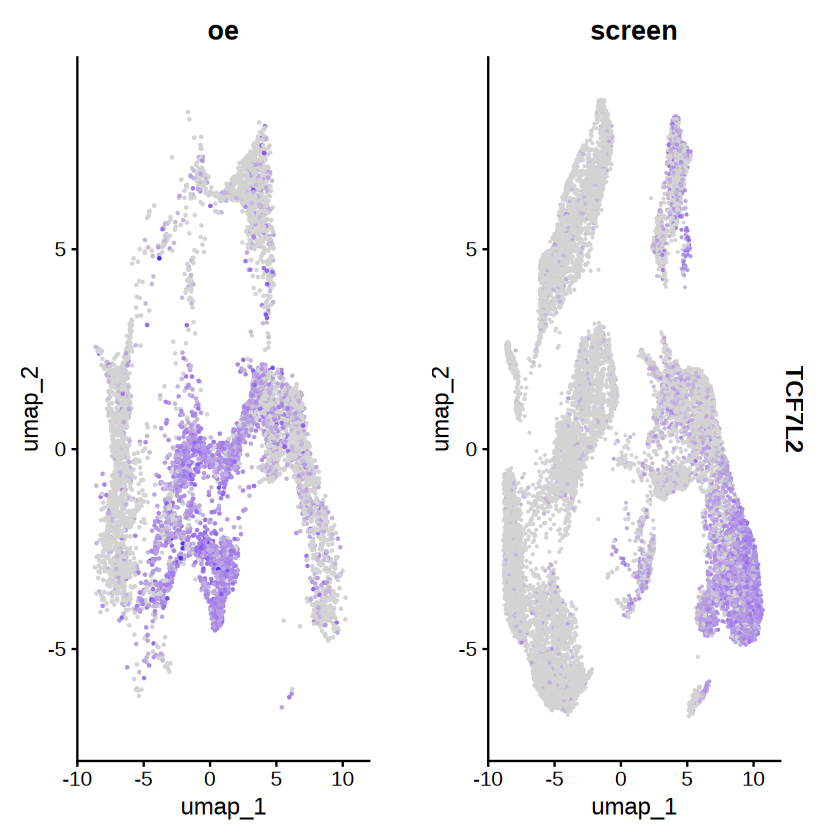

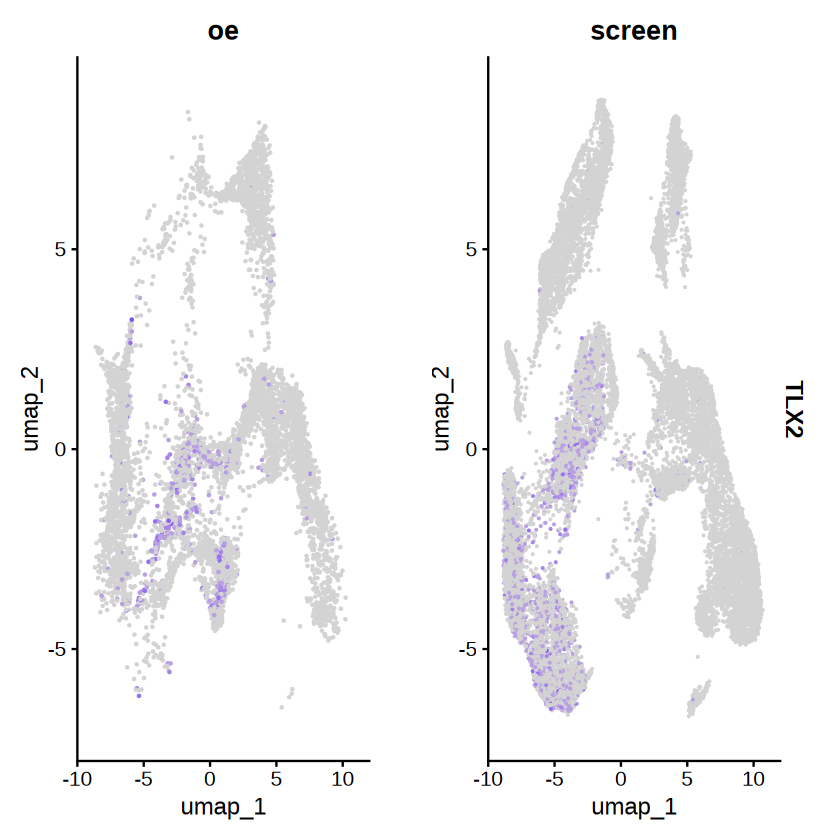

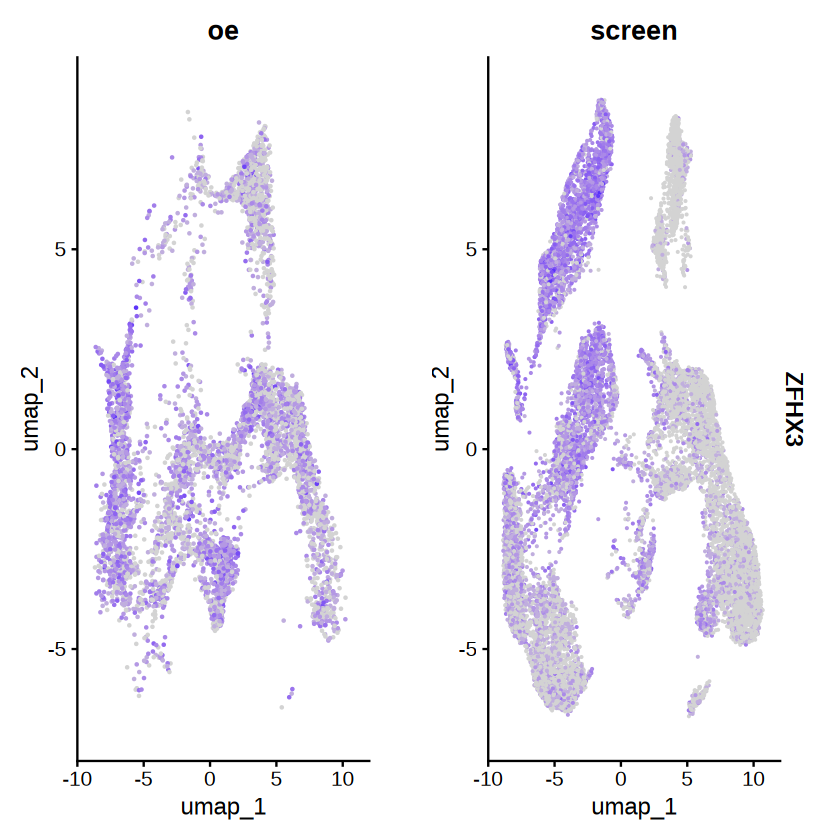

In [36]:
for(gene in genes_of_interest){
    a <- FeaturePlot(ifnb,features=c(gene),split.by = 'experiment',reduction = "umap")
    print(a)
}

In [37]:
ifnb@reductions

$pca
A dimensional reduction object with key PC_ 
 Number of dimensions: 50 
 Number of cells: 22378 
 Projected dimensional reduction calculated:  FALSE 
 Jackstraw run: FALSE 
 Computed using assay: SCT 

$umap.unintegrated
A dimensional reduction object with key umapunintegrated_ 
 Number of dimensions: 2 
 Number of cells: 22378 
 Projected dimensional reduction calculated:  FALSE 
 Jackstraw run: FALSE 
 Computed using assay: SCT 

$integrated.dr
A dimensional reduction object with key integrateddr_ 
 Number of dimensions: 50 
 Number of cells: 22378 
 Projected dimensional reduction calculated:  FALSE 
 Jackstraw run: FALSE 
 Computed using assay: SCT 

$umap
A dimensional reduction object with key umap_ 
 Number of dimensions: 2 
 Number of cells: 22378 
 Projected dimensional reduction calculated:  FALSE 
 Jackstraw run: FALSE 
 Computed using assay: SCT 


In [ ]:
for(gene in genes_of_interest){
    a <- FeaturePlot(ifnb,features=c(gene),split.by = 'experiment',reduction = "umap")
    print(a)
}

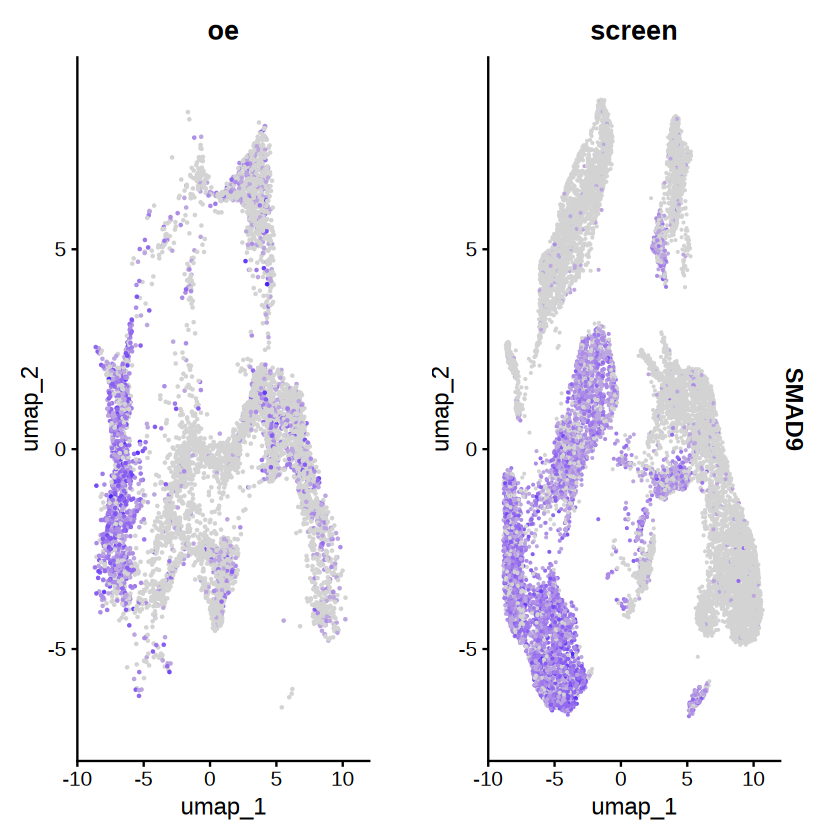

In [31]:
FeaturePlot(ifnb,features=c('SMAD9'),split.by = 'experiment',reduction = "umap")

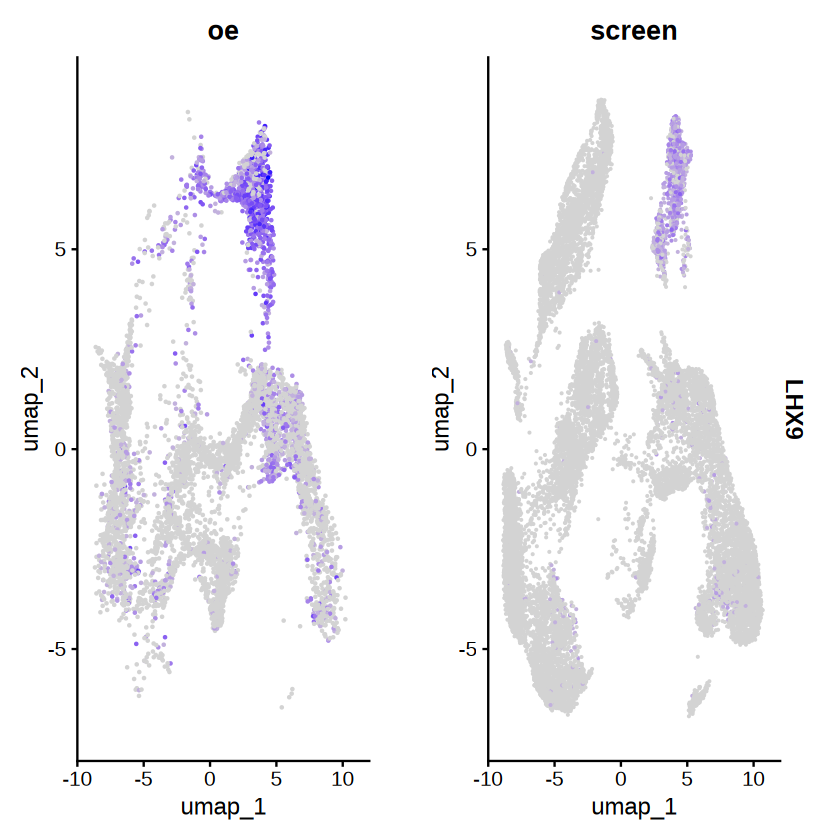

In [32]:
FeaturePlot(ifnb,features=c('LHX9'),split.by = 'experiment',reduction = "umap")

In [ ]:
FeaturePlot(ifnb,features=c('LHX9'),split.by = 'experiment',reduction = "umap")

In [18]:
ifnb@active.assay = "RNA"

In [19]:
ifnb <- IntegrateLayers(object = ifnb, method = CCAIntegration, orig.reduction = "pca", new.reduction = "integrated.cca",
    verbose = FALSE)


Warning message:
"Converting BPCells matrix to dgCMatrix for integration as on-disk CCA Integration is not currently supported"
Warning message:
"Converting BPCells matrix to dgCMatrix for integration as on-disk CCA Integration is not currently supported"


In [20]:
# re-join layers after integration
ifnb[["RNA"]] <- JoinLayers(ifnb[["RNA"]])

ifnb <- FindNeighbors(ifnb, reduction = "integrated.cca", dims = 1:30)
ifnb <- FindClusters(ifnb, resolution = 1)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 22378
Number of edges: 881819

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8981
Number of communities: 22
Elapsed time: 2 seconds


13:42:09 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by 'BiocGenerics'

13:42:09 Read 22378 rows and found 30 numeric columns

13:42:09 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by 'BiocGenerics'

13:42:09 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:42:11 Writing NN index file to temp file /tmp/RtmpucDc4R/file2072b441320c

13:42:11 Searching Annoy index using 1 thread, search_k = 3000

13:42:17 Annoy recall = 100%

13:42:18 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

13:42:19 Initializing from normalized Laplacian + 

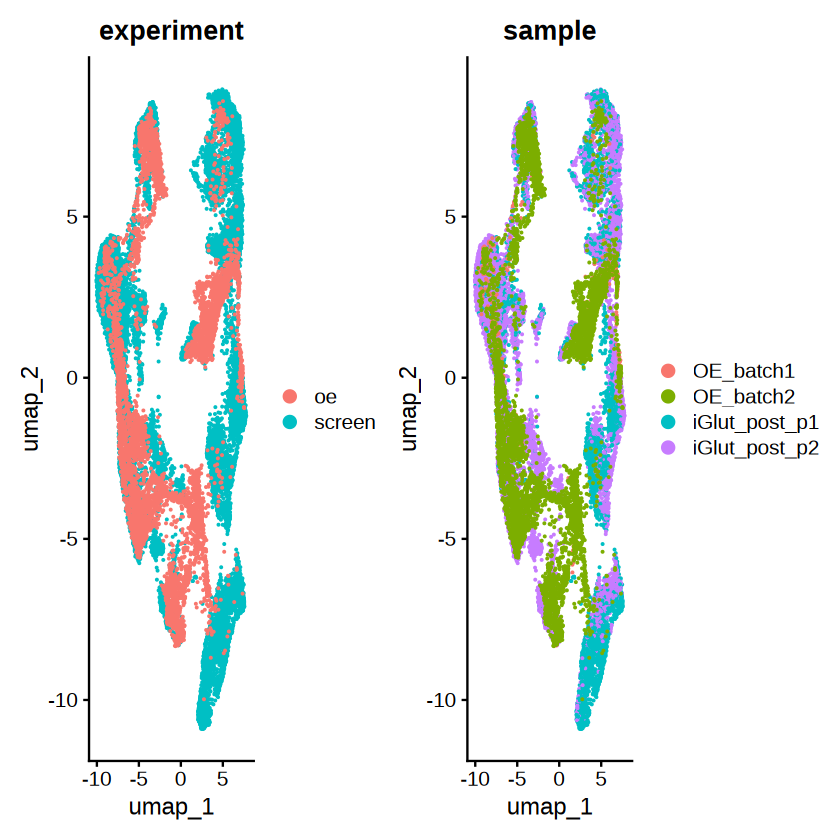

In [21]:
ifnb <- RunUMAP(ifnb, dims = 1:30, reduction = "integrated.cca")
DimPlot(ifnb, reduction = "umap", group.by = c("experiment","sample"))

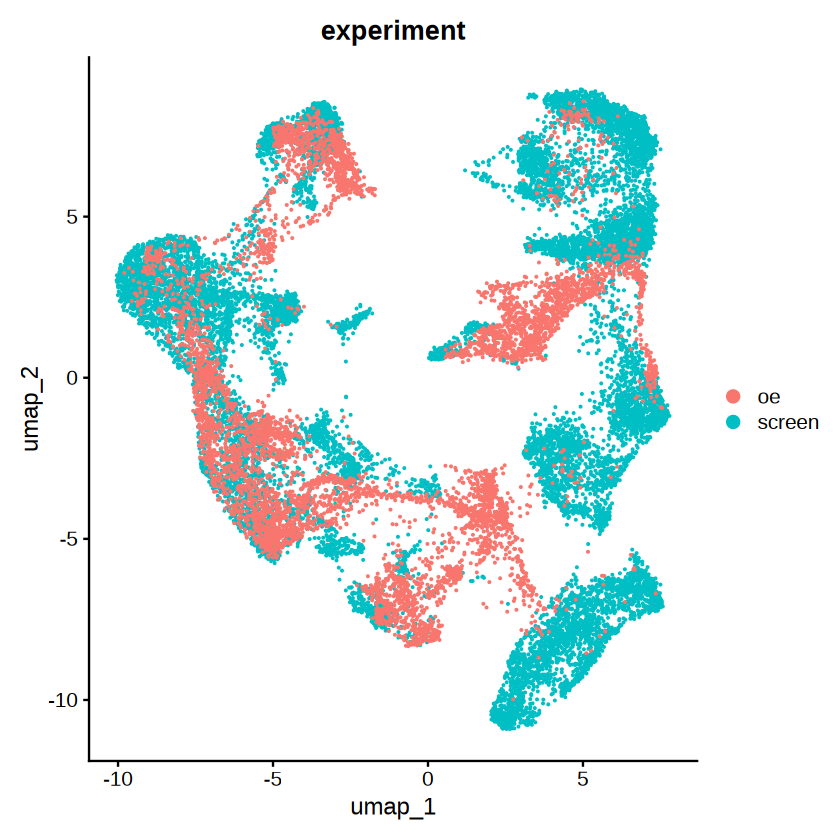

In [24]:
DimPlot(ifnb, reduction = "umap", group.by = c("experiment"))

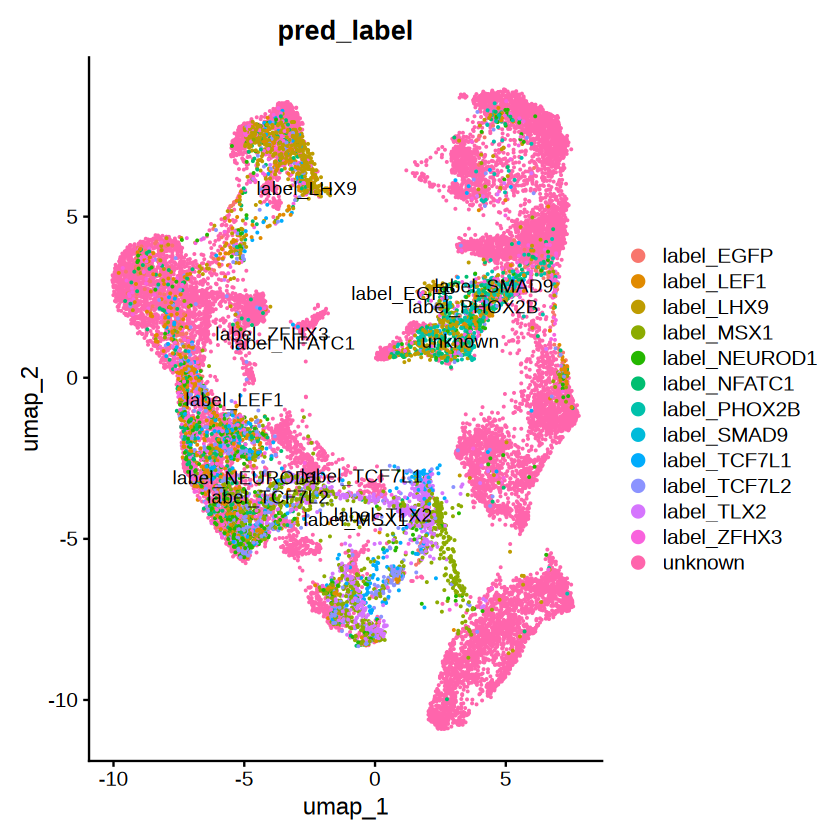

In [41]:
DimPlot(ifnb, reduction = "umap", group.by = c("pred_label"),label = T)

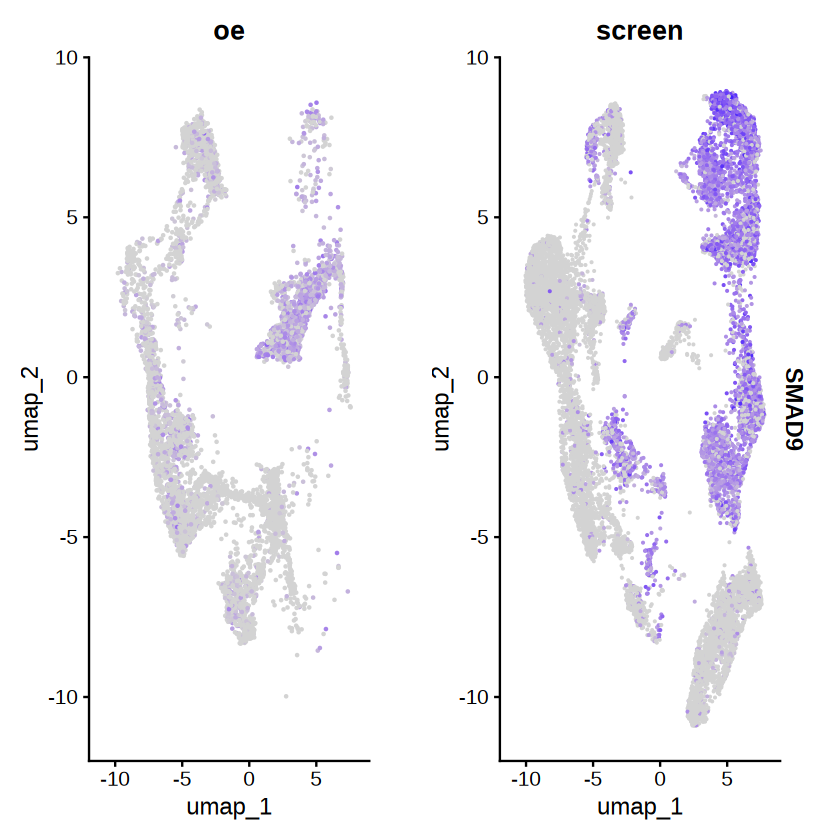

In [42]:
FeaturePlot(ifnb,features=c('SMAD9'),split.by = 'experiment',reduction = "umap")

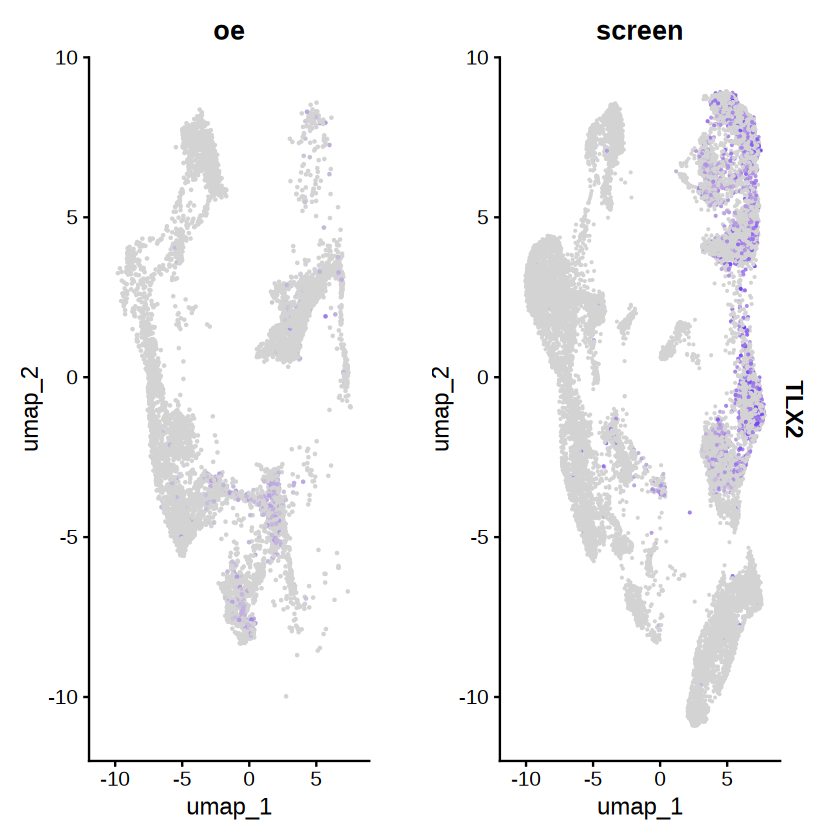

In [38]:
FeaturePlot(ifnb,features=c('TLX2'),split.by = 'experiment',reduction = "umap")

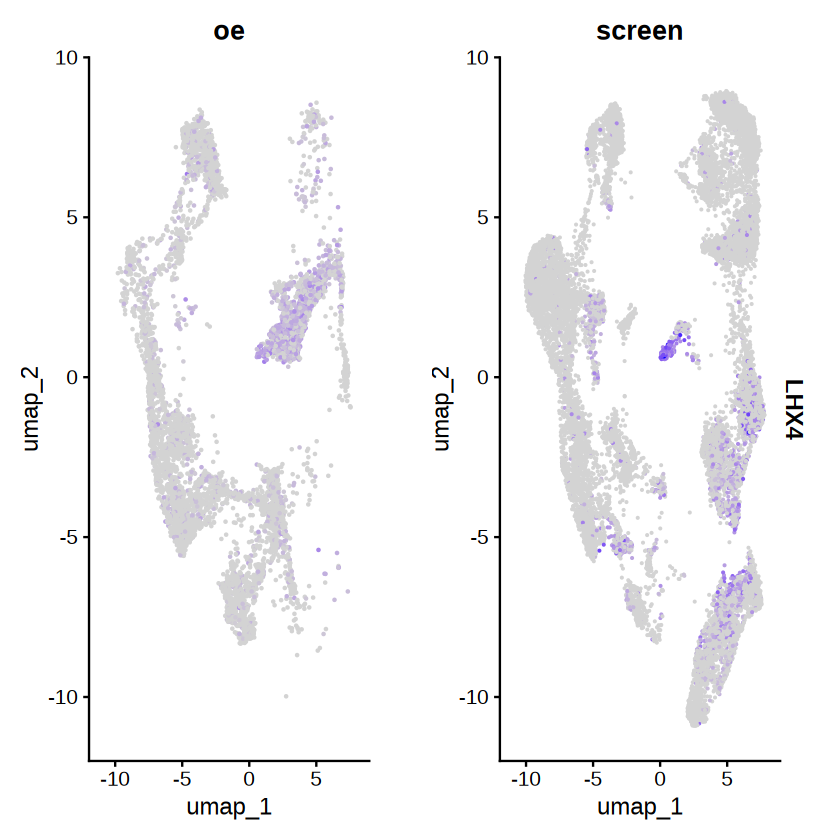

In [35]:
FeaturePlot(ifnb,features=c('LHX4'),split.by = 'experiment',reduction = "umap")

In [ ]:
FeaturePlot(ifnb,features=c('LEF1'),split.by = 'experiment',reduction = "umap")

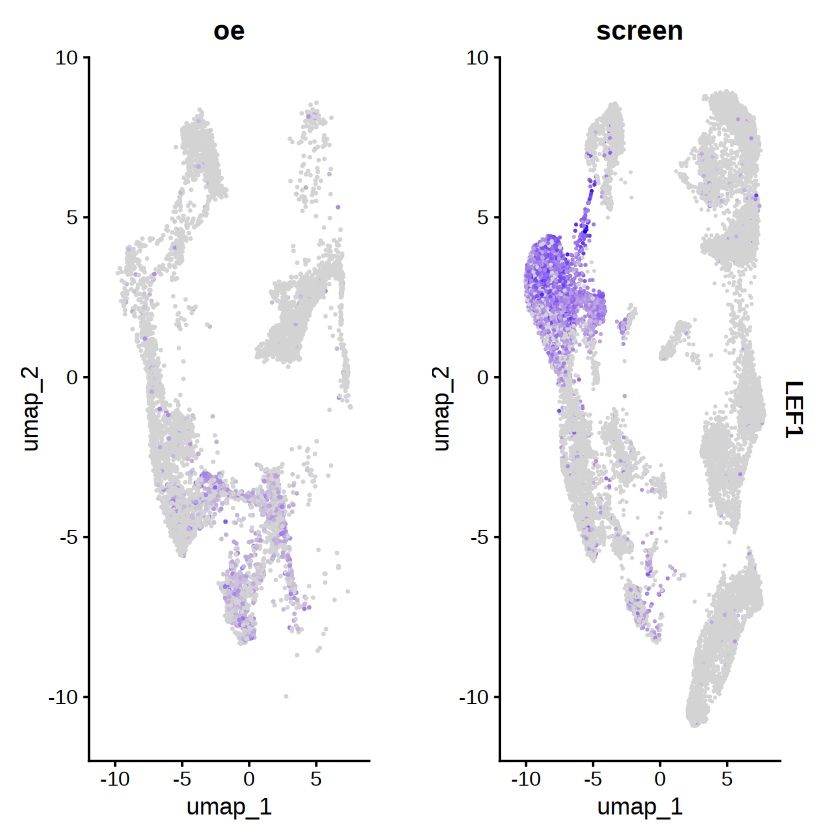

In [32]:
FeaturePlot(ifnb,features=c('LEF1'),split.by = 'experiment',reduction = "umap")